# Portfolio Management


**Objective:** In this project, we aim to build stylized long-short equity factor mimicking portfolios using different fundamental variables from Ken French’s data library and explore empirically their univariate efficacy over time and across different size segments. We then go on to build multi-factor strategies using alternative weighting schemes and compare them to the static equally weighted multi-factor strategy. Two alternative top-down factor weighting schemes will be considered: 
1. Equal risk contribution across factors 
2. Weighting based on factor persistence

**Data:** Attached with the project description are 6 csv files containing the monthly time series of value- and equal-weighted returns for portfolios formed on size and different fundamental variables consisting of **book-to-price, cashflow-to-price, dividend yield, investment, profitability, prior 1-month return and 12-1 price momentum**. In addition, there is a csv file named “F-F_Research_Data_Factors” which houses the Fama-French 3 factor model returns.

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy.optimize import minimize

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Book-to-price ratio - Value-weighted & equal-weighted portfolios
value_bp = pd.read_csv('6_Portfolios_ME_BP_2x3.csv', skiprows=15, nrows=1101, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_bp = pd.read_csv('6_Portfolios_ME_BP_2x3.csv', skiprows=1120, nrows=1101, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))

# Cashflow-to-price - Value-weighted & equal-weighted portfolios
value_cfp = pd.read_csv('6_Portfolios_ME_CFP_2x3.csv', skiprows=19, nrows=801, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_cfp = pd.read_csv('6_Portfolios_ME_CFP_2x3.csv', skiprows=824, nrows=801, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))

# Dividend Yield - Value-weighted & equal-weighted portfolios
value_dp = pd.read_csv('6_Portfolios_ME_DP_2x3.csv', skiprows=19, nrows=1089, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_dp = pd.read_csv('6_Portfolios_ME_DP_2x3.csv', skiprows=1112, nrows=1089, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))

# Profitability - Value-weighted & equal-weighted portfolios
value_pro = pd.read_csv('6_Portfolios_ME_OP_2x3.csv', skiprows=16, nrows=657, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_pro = pd.read_csv('6_Portfolios_ME_OP_2x3.csv', skiprows=677, nrows=657, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))

# 12-1 price momentum - Value-weighted & equal-weighted portfolios
value_mo = pd.read_csv('6_Portfolios_ME_Prior_12_2.csv', skiprows=11, nrows=1095, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_mo = pd.read_csv('6_Portfolios_ME_Prior_12_2.csv', skiprows=1110, nrows=1095, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))


In [5]:
# Note: lambda function reorders columns of the following dataframes so that lo minus hi is carried out. This is simply for ease.
reorder = lambda x: x[[x.columns[2],x.columns[1],x.columns[0],x.columns[5],x.columns[4],x.columns[3]]]

# Investment - Value-weighted & equal-weighted portfolios
value_inv = pd.read_csv('6_Portfolios_ME_INV_2x3.csv', skiprows=16, nrows=657, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_inv = pd.read_csv('6_Portfolios_ME_INV_2x3.csv', skiprows=677, nrows=657, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
value_inv, equal_inv = reorder(value_inv), reorder(equal_inv)

# Prior 1-month return - Value-weighted & equal-weighted portfolios
value_prior = pd.read_csv('6_Portfolios_ME_Prior_1_0.csv', skiprows=11, nrows=1106, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
equal_prior = pd.read_csv('6_Portfolios_ME_Prior_1_0.csv', skiprows=1121, nrows=1106, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))
value_prior, equal_prior = reorder(value_prior), reorder(equal_prior)

# fama french data factors
ff = pd.read_csv('F-F_Research_Data_Factors.csv', skiprows=3, nrows=1101, parse_dates=True, index_col=0, date_parser=lambda x:pd.to_datetime(x, format='%Y%m'))


In [6]:
# synchronizing every time series to start at the same date (the time series with the latest start date)
value_weight = [value_bp, value_cfp, value_dp, value_inv, value_pro, value_prior, value_mo]
latest_start_val = max([value_weight[i].index[0] for i in range(7)]) # find the time series with the latest date
value_weight = [value_weight[i][value_weight[i].index.get_loc(latest_start_val):] for i in range(7)]

equal_weight = [equal_bp, equal_cfp, equal_dp, equal_inv, equal_pro, equal_prior, equal_mo]
latest_start_eq = max([value_weight[i].index[0] for i in range(7)]) # find the time series with the latest date
equal_weight = [equal_weight[i][equal_weight[i].index.get_loc(latest_start_eq):] for i in range(7)]

fundamental_title = ['Book-to-Price', 'Cash-to-Price', 'Dividend Yield', 'Investment', 'Profitability', 'Prior Month Return', '12-1 Momentum']

### Task 1:
a) For each of the six fundamental variables, construct long-short factor mimicking portfolios and plot their historical performance across different size segments. <br>

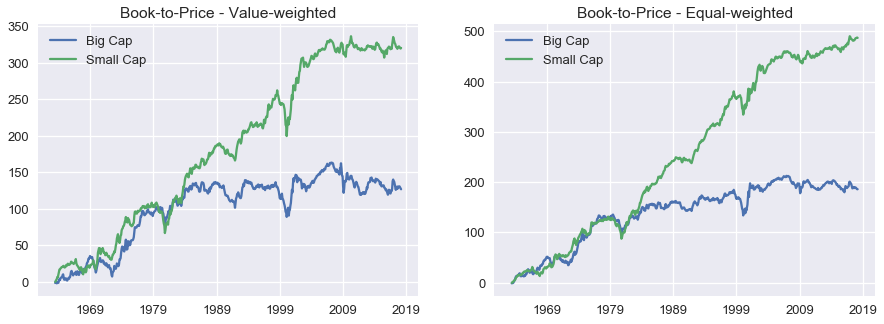

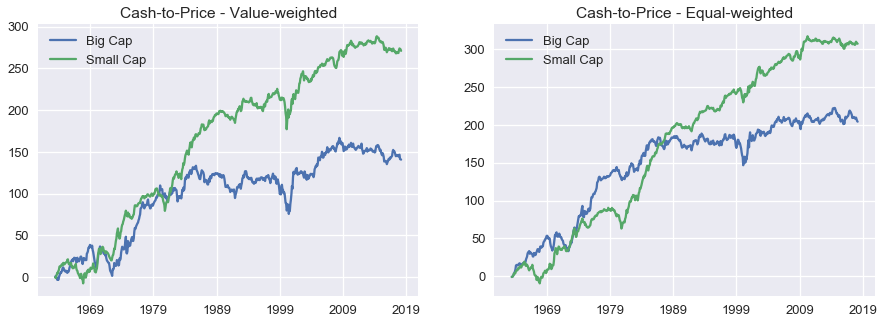

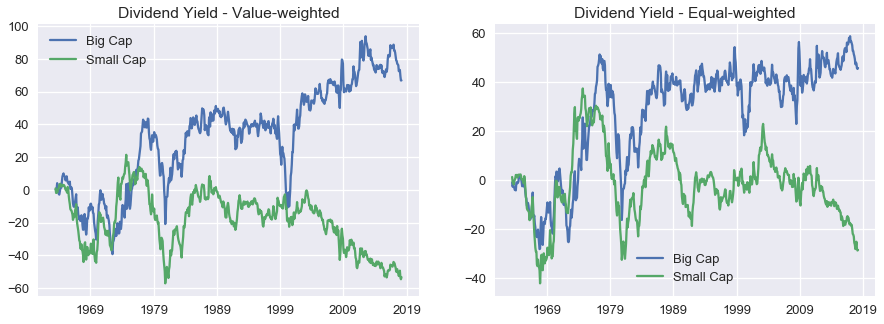

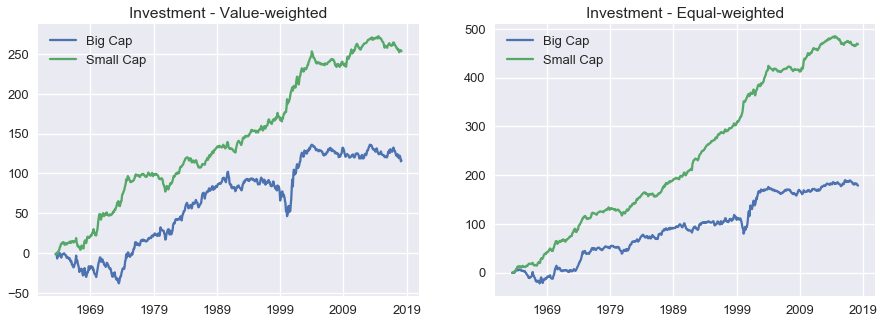

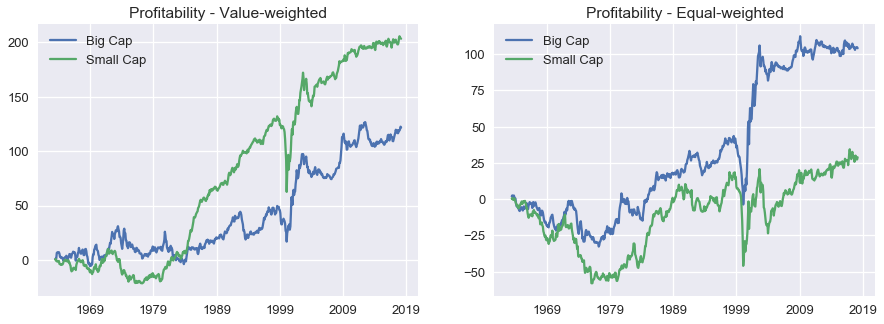

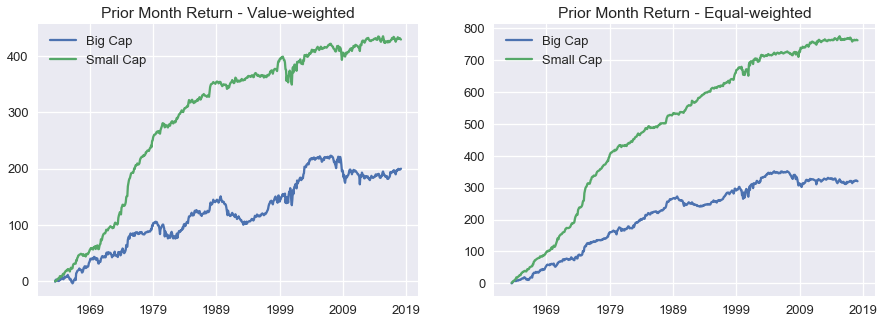

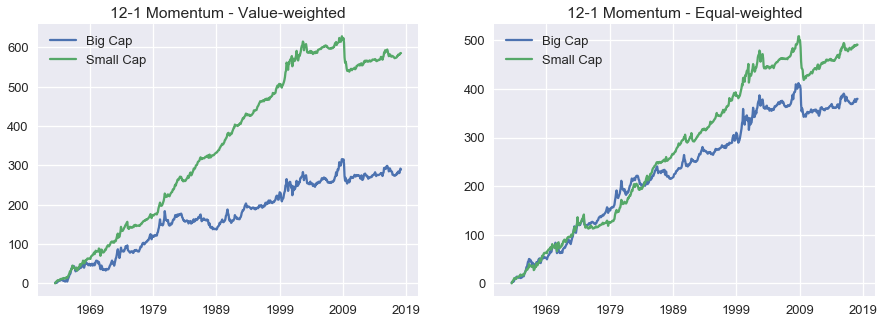

[None, None, None, None, None, None, None]

In [7]:
%matplotlib inline
# hi minus lo except for Investment & Prior month return - lo minus hi
f = lambda x, y: (x - y).cumsum() # cumulative sum
sns.set_context('talk')

def long_short(x,y,title):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    time_series_1 = pd.DataFrame({'Big Cap': f(x.iloc[:,5],x.iloc[:,3]), 'Small Cap': f(x.iloc[:,2],x.iloc[:,0])}) # low minus high
    time_series_2 = pd.DataFrame({'Big Cap': f(y.iloc[:,5],y.iloc[:,3]), 'Small Cap': f(y.iloc[:,2],y.iloc[:,0])})
    time_series_1.plot(ax=axs[0], title=title + ' - Value-weighted')
    time_series_2.plot(ax=axs[1], title=title + ' - Equal-weighted')  
    return plt.show()

[long_short(value_weight[i],equal_weight[i],fundamental_title[i]) for i in range(7)]

<font color='blue'><b>Comments:</b>
RMWt is the difference between the returns on diversified portfolios of stocks with robust and weak profitability, and CMAt is the difference between the returns on diversified portfolios of low and high investment stocks (Fama, French 2014)</font>

b) Taking the market return from Fama-French’s 3-factor model, calculate and plot the rolling 3-year market beta for these stylized portfolios. <br>

In [8]:
import statsmodels.api as sm

# note, this regression carries out a rolling window of 3 years
def regress(dataframe):
    
    # for the sake of not changing original dataframe
    df = dataframe 
    french = ff
    
    # to verify longer dataframe & match range of dates
    if len(ff) > len(df):
        french = ff[(ff.index >= df.index[0])]
    else:
        df = df[(df.index >= ff.index[0])]
    
    # after range of dates are equal, regression is carried out
    excess_ret = sm.add_constant(french['Mkt-RF'])
    small_hi_alpha, small_lo_alpha, big_hi_alpha, big_lo_alpha  = [], [], [], []
    small_hi_beta, small_lo_beta, big_hi_beta, big_lo_beta = [], [], [], []
    
    # returns minus risk-free rate, thereafter regression is run in a 3-year rolling window
    for i in np.arange(0,len(df)+1,1):
        small_hi, small_lo, big_hi, big_lo = df.iloc[:,2][i:i+36] - french.iloc[:,3][i:i+36], \
        df.iloc[:,0][i:i+36] - french.iloc[:,3][i:i+36], df.iloc[:,5][i:i+36] - french.iloc[:,3][i:i+36], \
        df.iloc[:,3][i:i+36] - french.iloc[:,3][i:i+36]
        
        # small cap hi
        if len(small_hi) == 36: #ensuring that range is 36 months
            est_1 = sm.OLS(small_hi, excess_ret[i:i+36]).fit()
            small_hi_alpha.append(est_1.params[0]); small_hi_beta.append(est_1.params[1])
        # small cap lo
        if len(small_lo) == 36: #ensuring that range is 36 months
            est_2 = sm.OLS(small_lo, excess_ret[i:i+36]).fit()
            small_lo_alpha.append(est_2.params[0]); small_lo_beta.append(est_2.params[1])
        # big cap hi
        if len(big_hi) == 36: #ensuring that range is 36 months
            est_3 = sm.OLS(big_hi, excess_ret[i:i+36]).fit()
            big_hi_alpha.append(est_3.params[0]); big_hi_beta.append(est_3.params[1])
        # big cap lo
        if len(big_lo) == 36: #ensuring that range is 36 months
            est_4 = sm.OLS(big_lo, excess_ret[i:i+36]).fit()
            big_lo_alpha.append(est_4.params[0]); big_lo_beta.append(est_4.params[1])
            
    table = pd.DataFrame({'small_hi_alpha': small_hi_alpha, 'small_lo_alpha': small_lo_alpha,\
                          'big_hi_alpha': big_hi_alpha, 'big_lo_alpha': big_lo_alpha,\
                          'small_hi_beta': small_hi_beta, 'small_lo_beta': small_lo_beta,\
                          'big_hi_beta': big_hi_beta, 'big_lo_beta': big_lo_beta,'date': df.iloc[:,0][35:len(df)]})
    
    return table.drop(columns=['date'])

In [9]:
# function to plot out market betas
def mkt_beta(value,equal,title):
    value_coef, equal_coef = regress(value), regress(equal) # running function regress
    value_beta, equal_beta = pd.DataFrame({'beta_small': value_coef['small_hi_beta'] - value_coef['small_lo_beta'], 
                                           'beta_big': value_coef['big_hi_beta'] - value_coef['big_lo_beta']}), \
    pd.DataFrame({'beta_small': equal_coef['small_hi_beta'] - equal_coef['small_lo_beta'], 
                                           'beta_big': equal_coef['big_hi_beta'] - equal_coef['big_lo_beta']})
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    value_beta[['beta_small', 'beta_big']].plot(ax=axs[0], title=title + ' - Value-weighted')
    equal_beta[['beta_small', 'beta_big']].plot(ax=axs[1], title=title + ' - Equal-weighted')
    return plt.show()

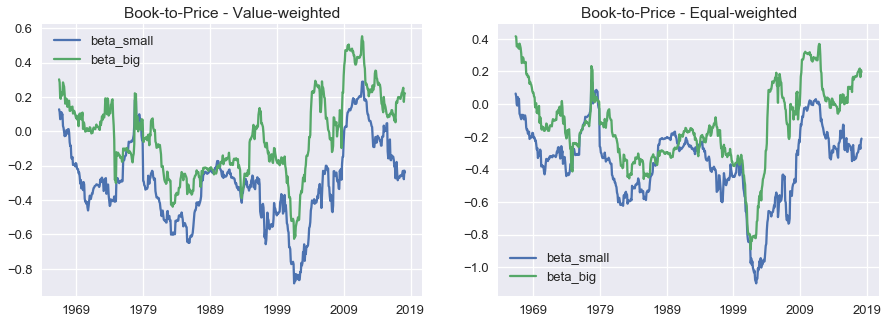

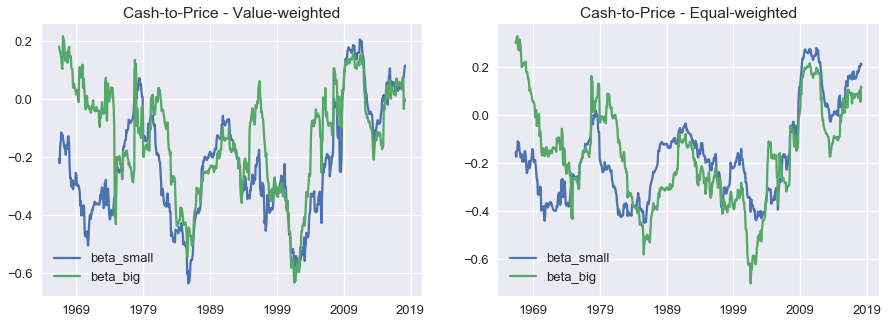

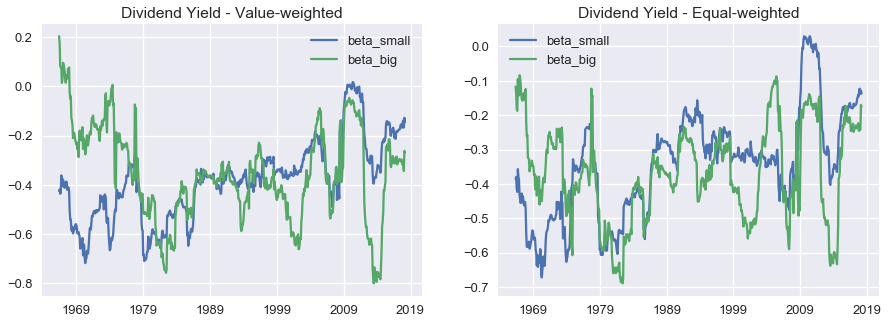

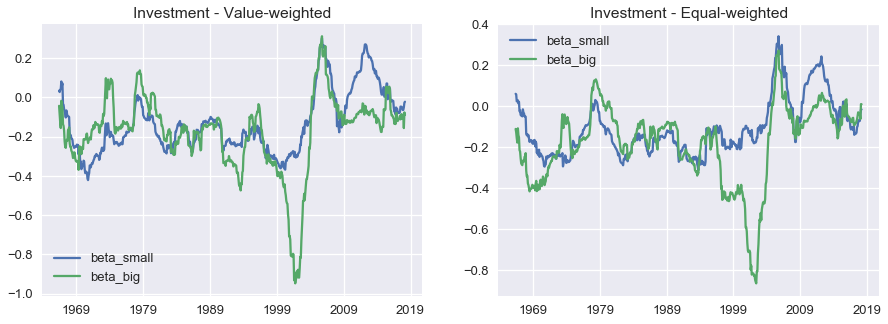

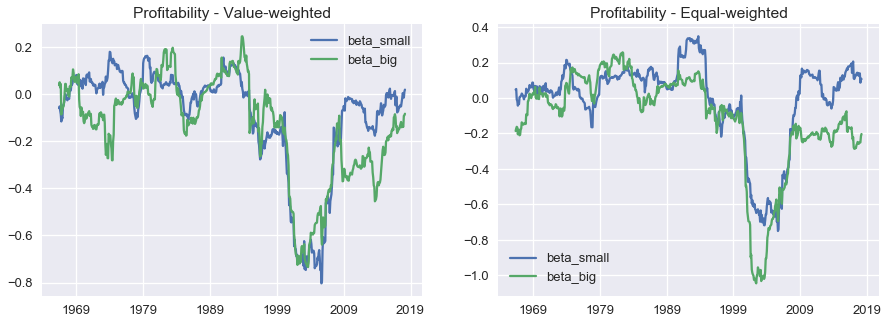

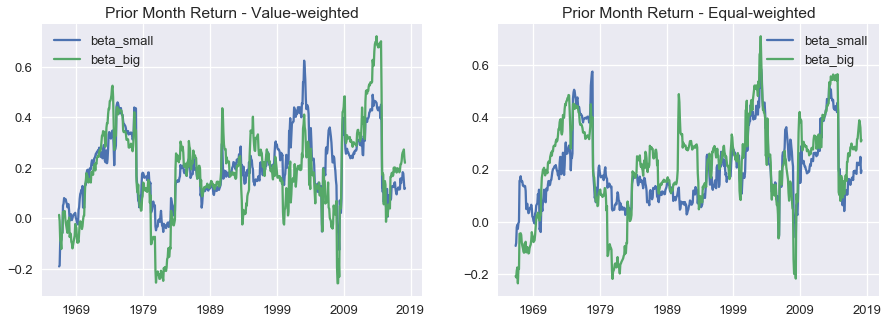

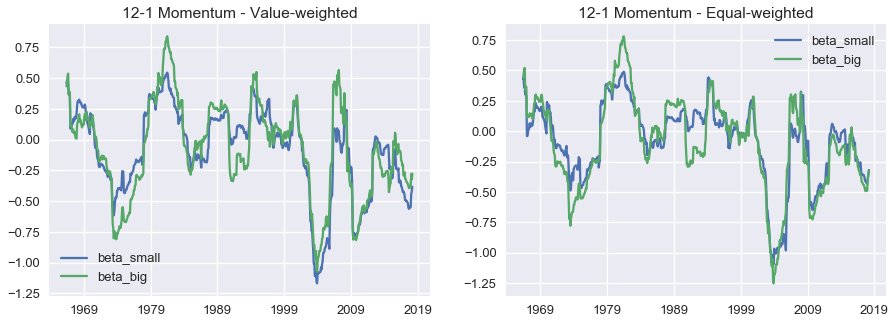

[None, None, None, None, None, None, None]

In [10]:
# subplots
[mkt_beta(value_weight[i],equal_weight[i],fundamental_title[i]) for i in range(7)]

c) Considering both size segments, construct a beta-neutral factor mimicking portfolio for each fundamental variable. Comment on your results. 

In [11]:
# Visit cvxpy.org, install cvxpy with conda:
# conda install -c conda-forge lapack
# conda install -c cvxgrp cvxpy

import cvxpy as cvx
from cvxpy import *

In [12]:
regress(equal_weight[0]).head()

,small_hi_alpha,small_lo_alpha,big_hi_alpha,big_lo_alpha,small_hi_beta,small_lo_beta,big_hi_beta,big_lo_beta
1966-06-01,0.958350,0.347505,0.352163,-0.020009,1.398671,1.334494,1.371389,0.956104
1966-07-01,1.006629,0.333040,0.402791,-0.003485,1.390437,1.342749,1.363743,0.952167
1966-08-01,1.050599,0.350458,0.484496,-0.064697,1.497007,1.500197,1.338580,0.986113
1966-09-01,1.025655,0.296740,0.493901,-0.039895,1.500606,1.510176,1.334304,0.978913
1966-10-01,0.889782,0.075358,0.499212,-0.056970,1.396012,1.353641,1.324883,0.960129


In [13]:
def optimize(regressed_df):
    
    w_big_lo, w_small_lo, w_big_hi, w_small_hi = [], [], [], []
    agg_alpha = []
    status = []
    lambd = 0.1 # cash reserve as a proportion of shorting stocks
    
    for i in np.arange(0,len(regressed_df),1): # len(df)-1
        
        # cvx variables of individual weights
        p1 = cvx.Variable() # short big cap lo weight
        p2 = cvx.Variable() # short small cap lo weight
        p3 = cvx.Variable() # long big cap hi weight
        p4 = cvx.Variable() # long small cap hi weight
        
        # sum of weight * beta = 0, p3 + p4 - 0.1*(p1 + p2) == 1
        constraints = [p1 <= 0, p2 <= 0, p3 >= 0, p4 >= 0,\
                       sum([p3*regressed_df['big_hi_beta'][i], p4*regressed_df['small_hi_beta'][i], \
                            p1*regressed_df['big_lo_beta'][i], p2*regressed_df['small_lo_beta'][i]]) == 0,\
                       p3 + p4 - 0.1*(p1 + p2) == 1] #
        
        obj = cvx.Maximize(sum([p1*regressed_df['big_lo_alpha'][i], p2*regressed_df['small_lo_alpha'][i], \
                                p3*regressed_df['big_hi_alpha'][i], p4*regressed_df['small_hi_alpha'][i]]))
        prob = cvx.Problem(obj, constraints)
        prob.solve()  # Returns the optimal value.
        #print("status:", prob.status)
        #print("optimal value", prob.value)
        #print("optimal var", p1.value, p2.value, p3.value, p4.value)
        status.append(prob.status); agg_alpha.append(prob.value); w_big_lo.append(p1.value); \
        w_small_lo.append(p2.value); w_big_hi.append(p3.value); w_small_hi.append(p4.value)
        
    weights_table = pd.DataFrame({'status': status, 'agg_alpha': agg_alpha, 'w_big_lo': w_big_lo, \
                                  'w_small_lo': w_small_lo, 'w_big_hi': w_big_hi, 'w_small_hi': w_small_hi})
    return weights_table

In [14]:
mean_smallHi, mean_bigHi, mean_smallLo, mean_bigLo = [], [], [], []
stdd_smallHi, stdd_bigHi, stdd_smallLo, stdd_bigLo = [], [], [], []

for i in np.arange(0,len(equal_weight[0]),1):
    mean_smallHi.append(equal_weight[0].iloc[:,2][i:i+36].mean()); stdd_smallHi.append(equal_weight[0].iloc[:,2][i:i+36].std())
    mean_bigHi.append(equal_weight[0].iloc[:,5][i:i+36].mean()); stdd_bigHi.append(equal_weight[0].iloc[:,5][i:i+36].std())
    mean_smallLo.append(equal_weight[0].iloc[:,0][i:i+36].mean()); stdd_smallLo.append(equal_weight[0].iloc[:,0][i:i+36].std())
    mean_bigLo.append(equal_weight[0].iloc[:,3][i:i+36].mean()); stdd_bigLo.append(equal_weight[0].iloc[:,3][i:i+36].std())
    


In [15]:
def optimize_sr(regressed_df, df):
    
    rf_rate = ff.iloc[:,3][36:len(df)] # risk-free rate
    df = df[36:]
    
    w_big_lo, w_small_lo, w_big_hi, w_small_hi = [], [], [], []
    agg_alpha = []
    status = []
    lambd = 0.1 # cash reserve as a proportion of shorting stocks
    
    for i in np.arange(0,len(df),1): # len(df)-1
        
        # cvx variables of individual weights
        p1 = cvx.Variable() # short big cap lo weight
        p2 = cvx.Variable() # short small cap lo weight
        p3 = cvx.Variable() # long big cap hi weight
        p4 = cvx.Variable() # long small cap hi weight
        
        # sum of weight * beta = 0, p3 + p4 - 0.1*(p1 + p2) == 1
        constraints = [p1 <= 0, p2 <= 0, p3 >= 0, p4 >= 0,\
                       sum([p3*regressed_df['big_hi_beta'][i], p4*regressed_df['small_hi_beta'][i], \
                            p1*regressed_df['big_lo_beta'][i], p2*regressed_df['small_lo_beta'][i]]) == 0,\
                       p3 + p4 - 0.1*(p1 + p2) == 1] #
        
        obj = cvx.Maximize(sum([p1*regressed_df['big_lo_alpha'][i], p2*regressed_df['small_lo_alpha'][i], \
                                p3*regressed_df['big_hi_alpha'][i], p4*regressed_df['small_hi_alpha'][i]]))
        prob = cvx.Problem(obj, constraints)
        prob.solve()  # Returns the optimal value.
        #print("status:", prob.status)
        #print("optimal value", prob.value)
        #print("optimal var", p1.value, p2.value, p3.value, p4.value)
        status.append(prob.status); agg_alpha.append(prob.value); w_big_lo.append(p1.value); \
        w_small_lo.append(p2.value); w_big_hi.append(p3.value); w_small_hi.append(p4.value)
        
    weights_table = pd.DataFrame({'status': status, 'agg_alpha': agg_alpha, 'w_big_lo': w_big_lo, \
                                  'w_small_lo': w_small_lo, 'w_big_hi': w_big_hi, 'w_small_hi': w_small_hi})
    return weights_table

In [16]:
def sum_of_betas(df, title):
    beta_values = regress(df).reset_index()
    beta_weights_ = optimize(regress(df))
    beta_times_weights = beta_values['big_hi_beta'] * beta_weights_['w_big_hi'] + \
    beta_values['small_hi_beta'] * beta_weights_['w_small_hi'] + \
    beta_values['big_lo_beta'] * beta_weights_['w_big_lo'] + \
    beta_values['small_lo_beta'] * beta_weights_['w_small_lo']
    
    total_weights_table = pd.DataFrame({'Date': beta_values['index'], 'sum beta weights': beta_times_weights})
    total_weights_table.set_index('Date', inplace = True)
    
    plt.figure(figsize=(15,5))
    plt.plot(total_weights_table)
    plt.title('Sum of beta weights' + ' - ' + title)
    return plt.show()

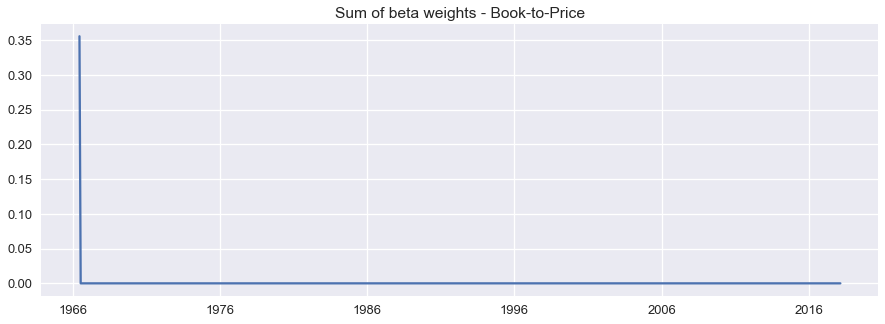

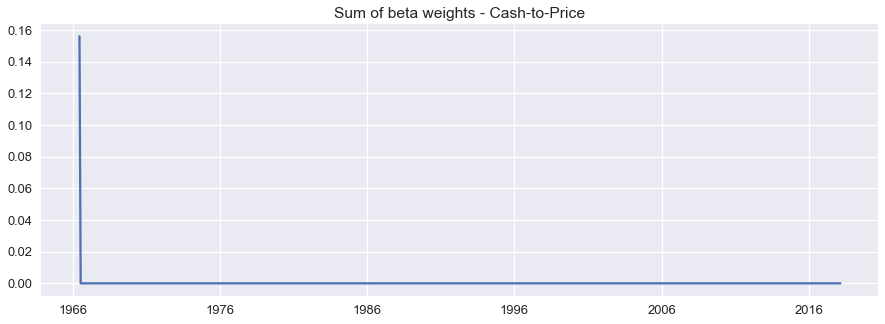

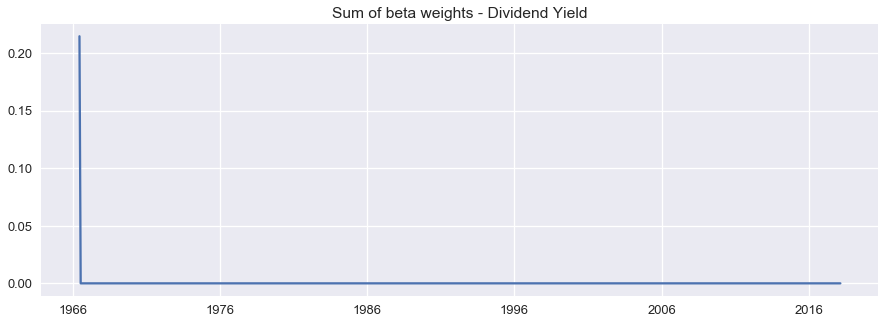

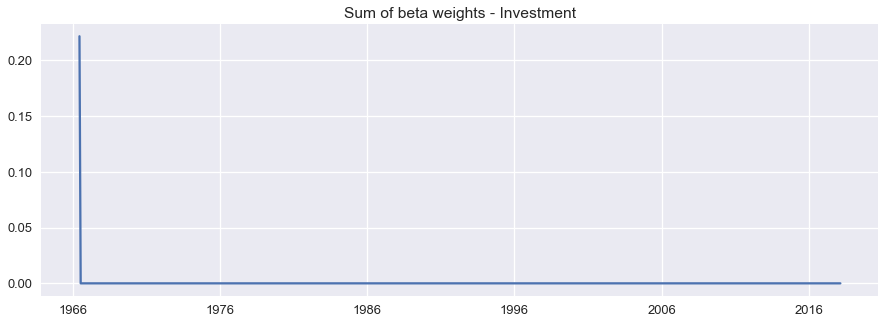

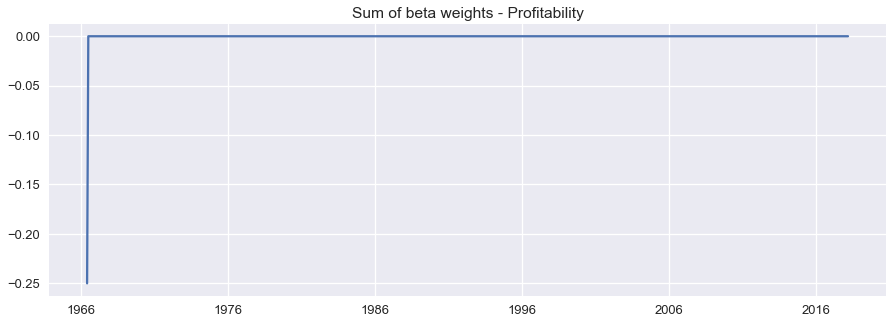

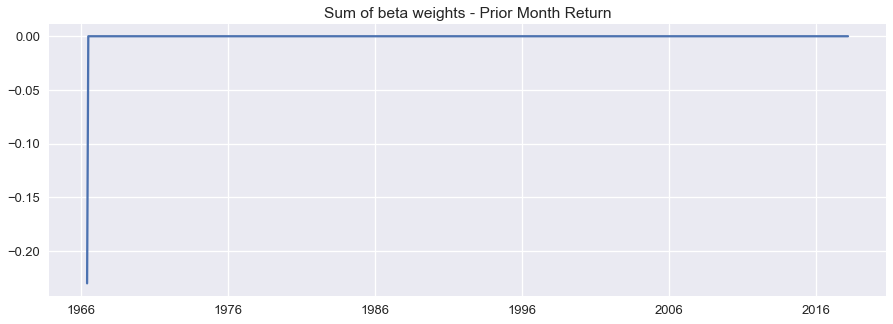

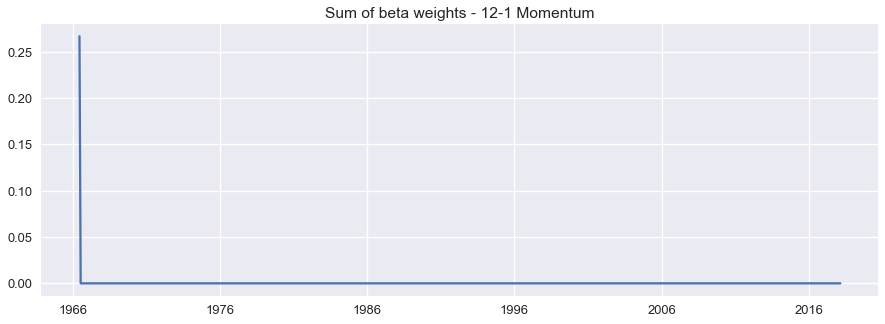

In [17]:
for i in range(7):
    sum_of_betas(equal_weight[i],fundamental_title[i])

In [18]:
def beta_neutral(df):
    betaWghts = optimize(regress(df)) # regressing to get beta coefficients & optimizing to get weights of betas
    # there are issues with multiplying columns of 2 diff dataframes with datetime index, hence datetime is pushed out of index
    readj_df = df.iloc[36:len(df)].reset_index() # initially put +1
    
    f = lambda x, y: (x - y).cumsum() # hi minus lo

    # beta neutral returns = (beta wt * big_hi + beta wt * small_hi) - (beta wt * big_lo + beta wt * small_lo)
    beta_portfolio_hi = (betaWghts['w_big_hi'] * readj_df.iloc[:,6]) + (betaWghts['w_small_hi'] * readj_df.iloc[:,3])
    beta_portfolio_lo = 0.1 * ((betaWghts['w_big_lo'] * readj_df.iloc[:,4]) + (betaWghts['w_small_lo'] * readj_df.iloc[:,1]))

    rf_rate = ff.iloc[:,3][36:len(df)].reset_index()
    mkt_ret = ff.iloc[:,0][36:len(df)].reset_index()

    betaNeu_vs_ls = pd.DataFrame({'Date': readj_df.iloc[:,0],\
                              'Beta Neutral': f(beta_portfolio_hi,beta_portfolio_lo), \
                              'Big Cap Long-short': f(readj_df.iloc[:,6],readj_df.iloc[:,4]), \
                              'Small Cap Long-short': f(readj_df.iloc[:,3],readj_df.iloc[:,1]),\
                              'Risk-free': f(rf_rate.iloc[:,1],0),\
                                  'Market': f(mkt_ret.iloc[:,1],0) })

    betaNeu_vs_ls.set_index('Date', inplace=True)
    
    return betaNeu_vs_ls

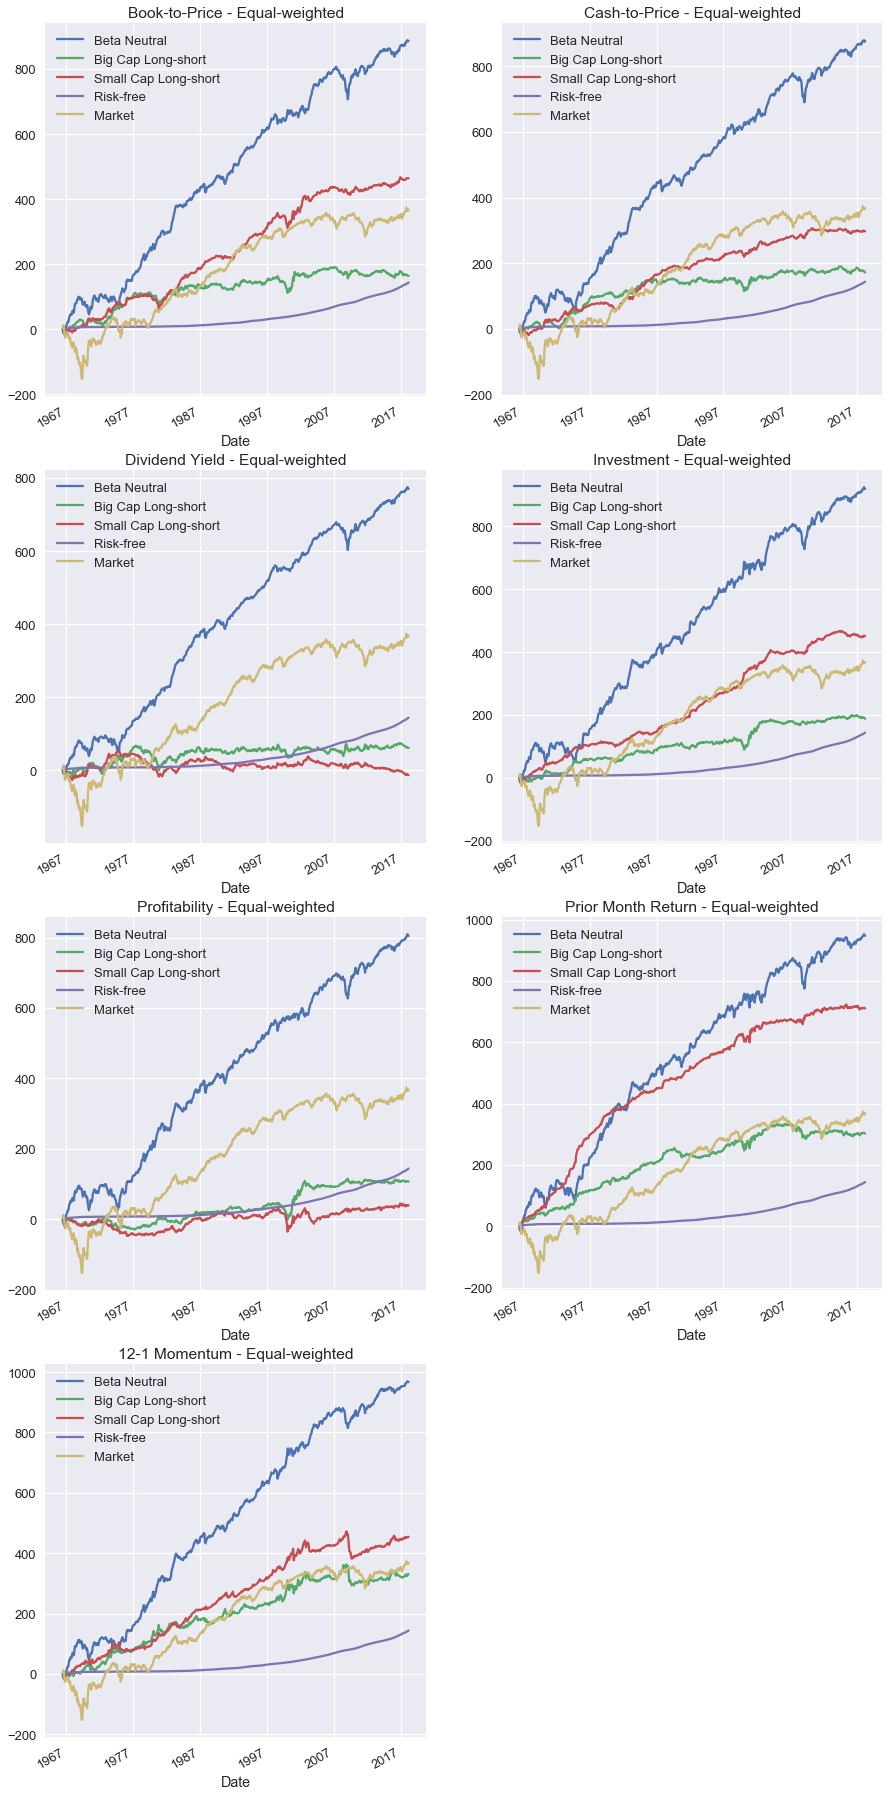

In [19]:
sns.set_context('talk')
fig, axs = plt.subplots(4,2,figsize=(15,35))
fig.delaxes(axs[-1, -1])

beta_neutral(equal_weight[0]).plot(ax=axs[0,0], title= fundamental_title[0] + ' - Equal-weighted')
beta_neutral(equal_weight[1]).plot(ax=axs[0,1], title= fundamental_title[1] + ' - Equal-weighted')
beta_neutral(equal_weight[2]).plot(ax=axs[1,0], title= fundamental_title[2] + ' - Equal-weighted')
beta_neutral(equal_weight[3]).plot(ax=axs[1,1], title= fundamental_title[3] + ' - Equal-weighted')
beta_neutral(equal_weight[4]).plot(ax=axs[2,0], title= fundamental_title[4] + ' - Equal-weighted')
beta_neutral(equal_weight[5]).plot(ax=axs[2,1], title= fundamental_title[5] + ' - Equal-weighted')
beta_neutral(equal_weight[6]).plot(ax=axs[3,0], title= fundamental_title[6] + ' - Equal-weighted')
plt.show()

In [20]:
def beta_neu_returns(df):
    betaWghts = optimize(regress(df)) # regressing to get beta coefficients & optimizing to get weights of betas
    # there are issues with multiplying columns of 2 diff dataframes with datetime index, hence datetime is pushed out of index
    readj_df = df.iloc[36:len(df)].reset_index() # initially put +1

    # beta neutral returns = (beta wt * big_hi + beta wt * small_hi) - (beta wt * big_lo + beta wt * small_lo)
    beta_portfolio_hi = (betaWghts['w_big_hi'] * readj_df.iloc[:,6]) + (betaWghts['w_small_hi'] * readj_df.iloc[:,3])
    beta_portfolio_lo = 0.1 * ((betaWghts['w_big_lo'] * readj_df.iloc[:,4]) + (betaWghts['w_small_lo'] * readj_df.iloc[:,1]))

    rf_rate = ff.iloc[:,3][36:len(df)].reset_index()
    mkt_ret = ff.iloc[:,0][36:len(df)].reset_index()

    nocumsum_ret = pd.DataFrame({'Date': readj_df.iloc[:,0],\
                              'Beta Neutral': beta_portfolio_hi - beta_portfolio_lo,'Market': mkt_ret.iloc[:,1] })

    nocumsum_ret.set_index('Date', inplace=True)
    
    return nocumsum_ret

In [21]:
corr_beta_mkt = pd.Series(dict(zip(fundamental_title, [beta_neu_returns(equal_weight[i]).corr()['Beta Neutral'][1] for i in range(7) ] ))).to_frame(name='Corr to Mkt Ret')
corr_beta_mkt['R-square'] = corr_beta_mkt['Corr to Mkt Ret']**2
corr_beta_mkt
# R square - how much of returns are explained by the factors

,Corr to Mkt Ret,R-square
Book-to-Price,-0.040217,0.001617
Cash-to-Price,-0.047421,0.002249
Dividend Yield,-0.025332,0.000642
Investment,-0.055678,0.003100
Profitability,-0.062471,0.003903
Prior Month Return,-0.056051,0.003142
12-1 Momentum,-0.072726,0.005289


In [22]:
beta_mean_ret = [beta_neu_returns(equal_weight[i])['Beta Neutral'].mean() for i in range(7)]
beta_std_dev = [beta_neu_returns(equal_weight[i])['Beta Neutral'].std() for i in range(7)]
ff_riskfree = ff.iloc[:,3][ff.index.get_loc(latest_start_eq):]

excess_beta_ret = [beta_neu_returns(equal_weight[i])['Beta Neutral'] - ff_riskfree[36:] for i in range(7)]

#ff_riskfree = ff_riskfree.reset_index(drop=True)
beta_sr = [(excess_beta_ret[i].mean())/beta_std_dev[i] for i in range(7)]

In [23]:
beta_desc_stats = pd.Series(dict(zip(fundamental_title, beta_mean_ret))).to_frame(name='Mean Returns')
beta_desc_stats['Std Dev'], beta_desc_stats['Sharpe'] = beta_std_dev, beta_sr
beta_desc_stats

,Mean Returns,Std Dev,Sharpe
Book-to-Price,1.426842,5.469917,0.189662
Cash-to-Price,1.412078,5.401856,0.189319
Dividend Yield,1.240001,4.159730,0.204484
Investment,1.478286,6.298557,0.172878
Profitability,1.295409,5.676204,0.159615
Prior Month Return,1.525127,7.014425,0.161912
12-1 Momentum,1.557825,5.759484,0.202869


### Task 2
a) Calculate the full sample correlation matrix of unadjusted factor returns (i.e. not the beta-neutral version) derived from 1. Comment on your findings. 

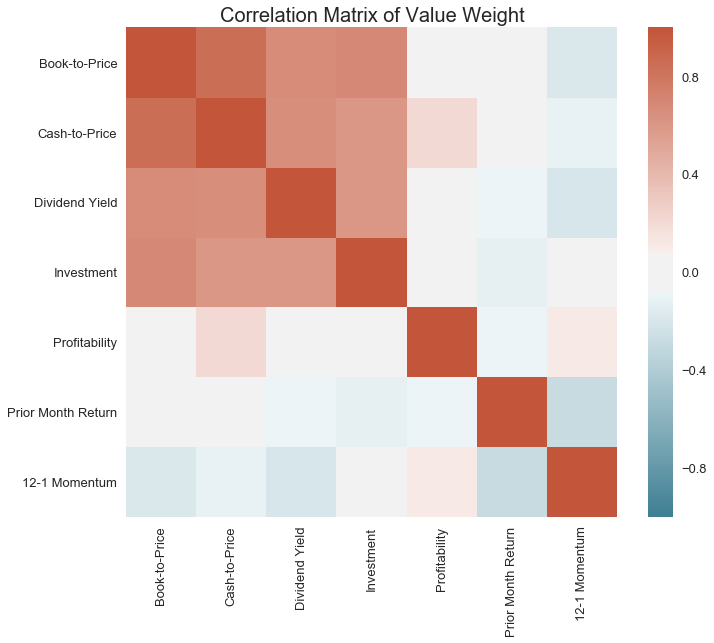

In [24]:
# 0.5 * (big_hi + small_hi) - 0.5 * (big_lo + small_lo)
# Average returns on the two high factor portfolios minus the average return on the two low factor portfolios
# except for Investment & Prior Month return (i.e. low minus high)
factor_return = lambda big_hi, small_hi, big_lo, small_lo: 0.5 * (big_hi + small_hi) - 0.5 * (big_lo + small_lo)

dic_val = [factor_return(value_weight[i].iloc[:,5], value_weight[i].iloc[:,2], value_weight[i].iloc[:,3], value_weight[i].iloc[:,0]) for i in range(7)]
dic_eq = [factor_return(equal_weight[i].iloc[:,5], equal_weight[i].iloc[:,2], equal_weight[i].iloc[:,3], equal_weight[i].iloc[:,0]) for i in range(7)]
#zipping labels with respective data into a dictionary with keys & values
corr_val, corr_eq = pd.DataFrame(dict(zip(fundamental_title, dic_val))), pd.DataFrame(dict(zip(fundamental_title, dic_eq)))


def corr_plot(df,title):
    # Generate a mask for the upper triangle
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Set up the matplotlib figure
    plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True) # Generate a custom diverging colormap
    sns.heatmap(df, cmap=cmap)
    plt.title('Correlation Matrix of ' + title, fontsize= 20)
    return plt.show()

corr_plot(corr_val.corr(), 'Value Weight')

In [25]:
corr_val.corr()

,Book-to-Price,Cash-to-Price,Dividend Yield,Investment,Profitability,Prior Month Return,12-1 Momentum
Book-to-Price,1.000000,0.847593,0.668925,0.688972,0.071422,0.003916,-0.185954
Cash-to-Price,0.847593,1.000000,0.658368,0.606040,0.209386,-0.052615,-0.115771
Dividend Yield,0.668925,0.658368,1.000000,0.606044,0.054613,-0.087263,-0.201054
Investment,0.688972,0.606040,0.606044,1.000000,-0.041520,-0.121822,-0.021388
Profitability,0.071422,0.209386,0.054613,-0.041520,1.000000,-0.087263,0.109749
Prior Month Return,0.003916,-0.052615,-0.087263,-0.121822,-0.087263,1.000000,-0.287986
12-1 Momentum,-0.185954,-0.115771,-0.201054,-0.021388,0.109749,-0.287986,1.000000


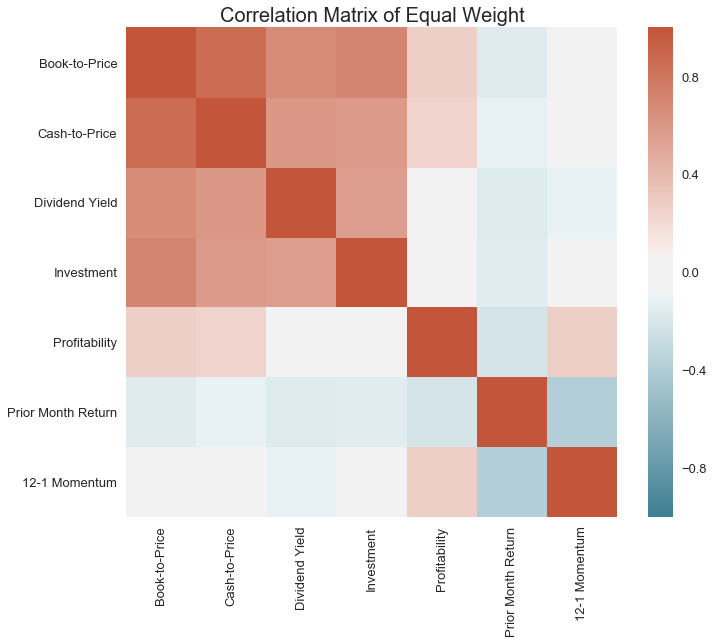

In [26]:
corr_plot(corr_eq.corr(), 'Equal Weight')

In [27]:
corr_eq.corr()

,Book-to-Price,Cash-to-Price,Dividend Yield,Investment,Profitability,Prior Month Return,12-1 Momentum
Book-to-Price,1.000000,0.862662,0.665483,0.710180,0.271472,-0.162697,-0.018718
Cash-to-Price,0.862662,1.000000,0.608558,0.579812,0.248993,-0.117042,-0.046817
Dividend Yield,0.665483,0.608558,1.000000,0.556062,-0.013074,-0.165041,-0.116451
Investment,0.710180,0.579812,0.556062,1.000000,-0.003086,-0.152950,-0.012310
Profitability,0.271472,0.248993,-0.013074,-0.003086,1.000000,-0.215088,0.270657
Prior Month Return,-0.162697,-0.117042,-0.165041,-0.152950,-0.215088,1.000000,-0.383255
12-1 Momentum,-0.018718,-0.046817,-0.116451,-0.012310,0.270657,-0.383255,1.000000


b) Using a lookback period of 5 years, employ an equal risk contribution factor weighting strategy with monthly rebalancing. The monthly resultant portfolios should be dollar neutral with a long leg exposure of 100%. 

In [28]:
column_names = corr_eq.columns.values # collect names of columns
weights = np.repeat(1/7,7) # equal portfolio weights 1 / 7. Set as matrix.

def risk_budget_objective(weights, cov_df):
    
    w = np.matrix(weights) # set weights to a matrix
    cov_matrix = cov_df.values # set covariance df as a matrix with .values
    portfolio_sig = np.sqrt((w * cov_matrix * w.T)[0,0]) # portfolio risk
    
    mar_risk_contrib = cov_matrix * w.T # marginal risk contribution
    factor_risk_contrib = np.multiply(mar_risk_contrib, w.T)/portfolio_sig  # Risk Contribution
    
    x_t = [1/7] * 7 # your risk budget percent of total portfolio risk (equal risk). list of 1/7
    risk_target = np.asmatrix(np.multiply(portfolio_sig, x_t)) # multiplying equal risk percent with portfolio risk
    
    J = sum(np.square(factor_risk_contrib - risk_target.T))[0,0] # sum of squared error
    
    return J


def erc_weights(weights, cov_df):
    # Restrictions to consider in the optimisation: only long positions whose sum equals 100%
    total_weight_constraint = lambda x: np.sum(x)-1.0 
    long_only_constraint = lambda x: x
    cons = ({'type': 'eq', 'fun': total_weight_constraint}, {'type': 'ineq', 'fun': long_only_constraint})
    res= minimize(risk_budget_objective, weights, cov_df, method='SLSQP',constraints=cons, options={'disp': True})
    return res.x

In [29]:
df_erc = pd.DataFrame(columns=column_names, index=range(0,len(corr_eq)-59)) # empty dataframe

for i in np.arange(0,len(corr_eq)-59,1):  # 597 rows in dataframe
    if len(corr_eq[i:i+60]) == 60: 
        
        # finding erc weights of each factor. corr_eq[i:i+60].cov() -> covariances of factors from i to i+60
        # weights are in column vector. .T is to convert to row vector
        # np.asarray -> changes matrix to array. np.squeeze -> removes list characteristic & give value
        df_erc.iloc[i] = pd.Series(dict(zip(column_names, \
                                            erc_weights(weights, corr_eq[i:i+60].cov().T) )))

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.012044280399780383
            Iterations: 12
            Function evaluations: 111
            Gradient evaluations: 12
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.012344623492265564
            Iterations: 11
            Function evaluations: 103
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.012493540933967515
            Iterations: 12
            Function evaluations: 111
            Gradient evaluations: 12
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0124766553290761
            Iterations: 10
            Function evaluations: 94
            Gradient evaluations: 10
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.012732472459332574
            Iterations: 12
        

            Gradient evaluations: 14
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.153461222968894e-10
            Iterations: 13
            Function evaluations: 126
            Gradient evaluations: 13
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.6817993353741102e-08
            Iterations: 13
            Function evaluations: 126
            Gradient evaluations: 13
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.272687786365467e-07
            Iterations: 12
            Function evaluations: 115
            Gradient evaluations: 12
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.4839794841332317e-07
            Iterations: 12
            Function evaluations: 117
            Gradient evaluations: 12
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.14960568

            Current function value: 0.053580890211512716
            Iterations: 12
            Function evaluations: 116
            Gradient evaluations: 12
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.05353561004323184
            Iterations: 13
            Function evaluations: 123
            Gradient evaluations: 13
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.05310049668463676
            Iterations: 12
            Function evaluations: 115
            Gradient evaluations: 12
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0543888510480071
            Iterations: 10
            Function evaluations: 96
            Gradient evaluations: 10
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0543546026641371
            Iterations: 12
            Function evaluations: 114
            Gradient evaluati

            Current function value: 0.030961075216575193
            Iterations: 11
            Function evaluations: 106
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.031672520693812455
            Iterations: 11
            Function evaluations: 104
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.031208900828223224
            Iterations: 9
            Function evaluations: 87
            Gradient evaluations: 9
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.027779287879090814
            Iterations: 11
            Function evaluations: 105
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.027608466833376494
            Iterations: 11
            Function evaluations: 104
            Gradient eval

            Current function value: 1.7580107096992222e-07
            Iterations: 13
            Function evaluations: 124
            Gradient evaluations: 13
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.9738348896369594e-07
            Iterations: 13
            Function evaluations: 124
            Gradient evaluations: 13
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.041501263123585e-07
            Iterations: 13
            Function evaluations: 124
            Gradient evaluations: 13
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.659813943683829e-07
            Iterations: 15
            Function evaluations: 145
            Gradient evaluations: 15
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.067413675028859e-07
            Iterations: 13
            Function evaluations: 123
            Gra

            Function evaluations: 107
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.3386011469661178e-07
            Iterations: 11
            Function evaluations: 107
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.6840957629423975e-07
            Iterations: 11
            Function evaluations: 107
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5.867195148162343e-07
            Iterations: 12
            Function evaluations: 116
            Gradient evaluations: 12
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.751187811371061e-07
            Iterations: 12
            Function evaluations: 115
            Gradient evaluations: 12
Optimization terminated successfully.    (Exit mode 0)
        

            Current function value: 7.933725530078549e-08
            Iterations: 12
            Function evaluations: 113
            Gradient evaluations: 12
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.1439225277616993e-07
            Iterations: 12
            Function evaluations: 114
            Gradient evaluations: 12
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.926638335120947e-08
            Iterations: 12
            Function evaluations: 114
            Gradient evaluations: 12
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.571773342458591e-07
            Iterations: 12
            Function evaluations: 113
            Gradient evaluations: 12
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.5693979750641586e-08
            Iterations: 12
            Function evaluations: 114
            Gra

            Function evaluations: 105
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.887129332358195e-08
            Iterations: 11
            Function evaluations: 104
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6.719769991525281e-09
            Iterations: 11
            Function evaluations: 104
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.3837747060844319e-08
            Iterations: 11
            Function evaluations: 106
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.851848212295534e-08
            Iterations: 11
            Function evaluations: 104
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
         

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.4929906547423298e-07
            Iterations: 11
            Function evaluations: 105
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.5052549060003846e-07
            Iterations: 11
            Function evaluations: 105
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.781364552003122e-07
            Iterations: 10
            Function evaluations: 96
            Gradient evaluations: 10
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.631305632838547e-07
            Iterations: 10
            Function evaluations: 96
            Gradient evaluations: 10
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.371693256964634e-08
            Iterations: 10


            Current function value: 8.898254401375217e-11
            Iterations: 11
            Function evaluations: 106
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.4212567831896239e-08
            Iterations: 13
            Function evaluations: 126
            Gradient evaluations: 13
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.979351045627826e-08
            Iterations: 13
            Function evaluations: 125
            Gradient evaluations: 13
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.2882977540446366e-07
            Iterations: 15
            Function evaluations: 143
            Gradient evaluations: 15
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.3024555699478603e-07
            Iterations: 12
            Function evaluations: 116
            Gr

            Current function value: 5.246524631002875e-09
            Iterations: 11
            Function evaluations: 109
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.8371253383987934e-09
            Iterations: 11
            Function evaluations: 109
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.083238036815437e-09
            Iterations: 11
            Function evaluations: 109
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.2327373041597967e-09
            Iterations: 11
            Function evaluations: 109
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.3859342711504883e-09
            Iterations: 11
            Function evaluations: 109
            Gr

            Iterations: 11
            Function evaluations: 105
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.846980126779098e-08
            Iterations: 9
            Function evaluations: 88
            Gradient evaluations: 9
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.8533710566996625e-08
            Iterations: 10
            Function evaluations: 96
            Gradient evaluations: 10
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.8573580032486093e-07
            Iterations: 9
            Function evaluations: 88
            Gradient evaluations: 9
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.7300839750319224e-08
            Iterations: 10
            Function evaluations: 96
            Gradient evaluations: 10
Optimization terminated successfully.    (E

            Gradient evaluations: 10
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5.434485717343348e-08
            Iterations: 10
            Function evaluations: 97
            Gradient evaluations: 10
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6.572174912863306e-08
            Iterations: 10
            Function evaluations: 97
            Gradient evaluations: 10
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6.022455155250802e-09
            Iterations: 10
            Function evaluations: 97
            Gradient evaluations: 10
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.6682793478336261e-09
            Iterations: 10
            Function evaluations: 97
            Gradient evaluations: 10
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.7866790754900

In [34]:
# Equal risk contribution factor weighting strategy with monthly rebalancing
df_erc['Date'] = corr_eq.index[59:] # start date 1968-06-01, end date: 2018-03-01
df_erc.set_index('Date', inplace=True)
df_erc.head() # use df_erc.sum(axis=1) to check if all weights sum to 1

,12-1 Momentum,Book-to-Price,Cash-to-Price,Dividend Yield,Investment,Prior Month Return,Profitability
Date,,,,,,,
1968-06-01,0.248627,0.112261,0.132397,0.132183,0.118634,0.255897,-2.93975e-16
1968-07-01,0.250056,0.108092,0.127968,0.127,0.118966,0.267919,-5.11221e-16
1968-08-01,0.24861,0.108018,0.127614,0.128077,0.117736,0.269944,-1.57612e-14
1968-09-01,0.248067,0.107864,0.127917,0.12789,0.117323,0.270939,1.20125e-16
1968-10-01,0.25226,0.107637,0.129111,0.125962,0.117615,0.267415,-3.96628e-16


c) Plot the monthly factor weights over time and evaluate the strategy performance against the static equally weighted factor portfolio. Comment on your results. (Hint: Use Matlab’s fmincon function as detailed below)

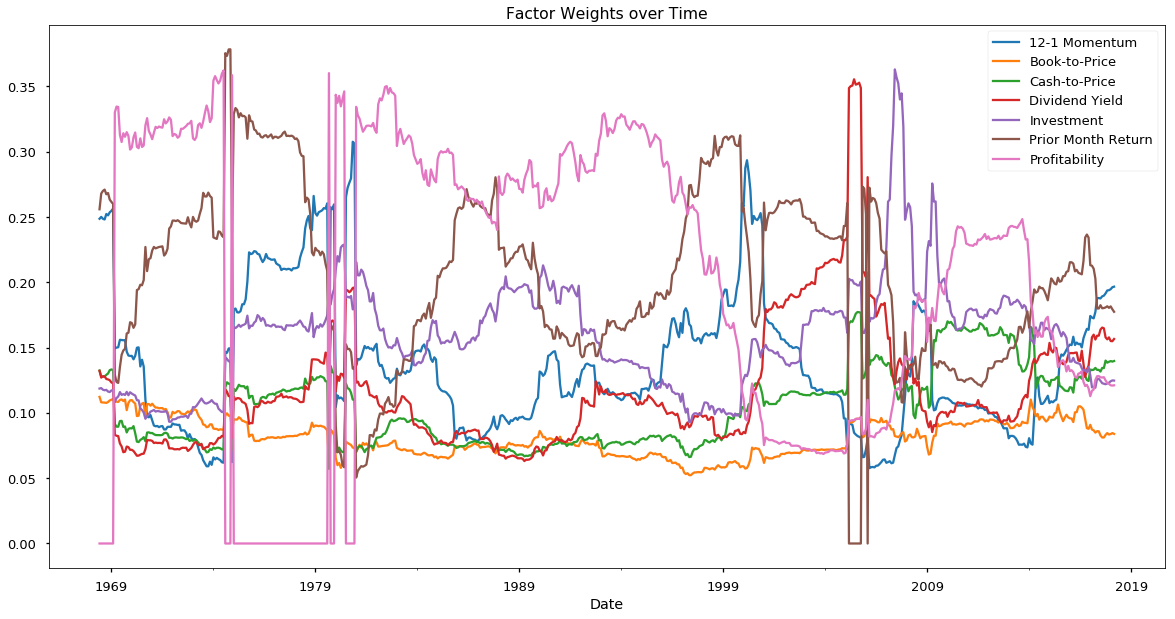

In [35]:
sns.set_context('talk') # set plot to a approriate view & fontsize
df_erc.plot(figsize=(20,10), title='Factor Weights over Time')

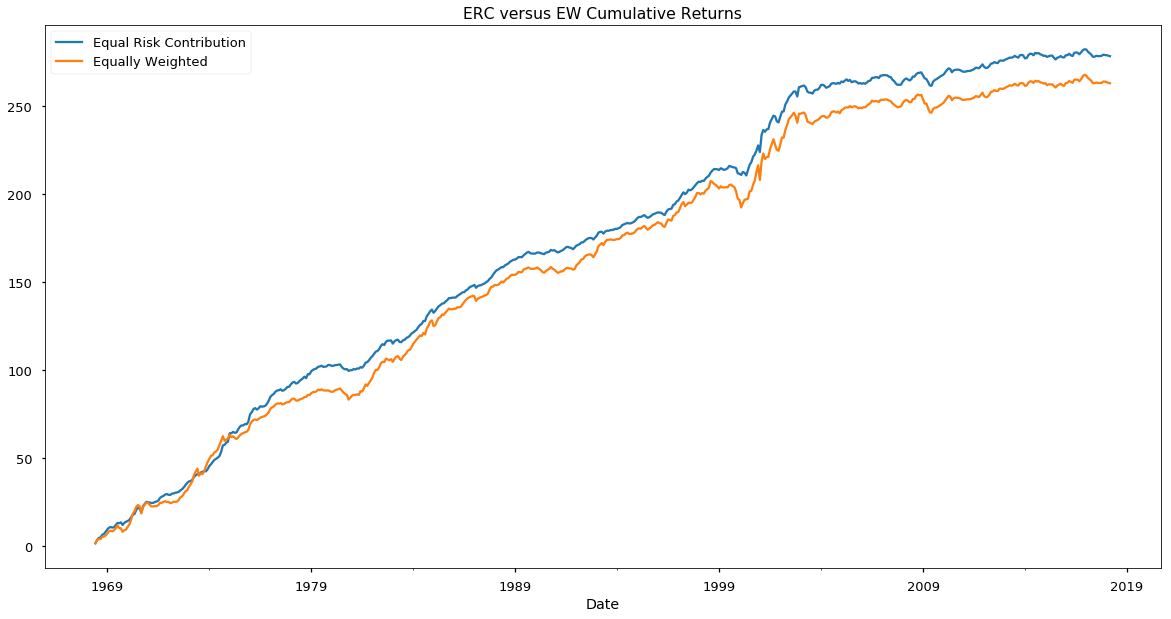

In [37]:
# Strategy performance of ERC vs EW portfolios

# ERC cumulative returns
erc_portfolio = df_erc*corr_eq[59:] # weights * returns starting from 1968-06-01
erc_portfolio = erc_portfolio.sum(axis=1).cumsum() # sum all factor returns for each month. Cumsum for the entire period

# EW cumulative returns 
eq_weighted_portfolio = corr_eq[59:]*1/7
eq_weighted_portfolio = eq_weighted_portfolio.sum(axis=1).cumsum()
strat_perform_1 = pd.DataFrame({'Equal Risk Contribution': erc_portfolio, 'Equally Weighted': eq_weighted_portfolio})

sns.set_context('talk')
strat_perform_1.plot(figsize=(20,10), title='ERC versus EW Cumulative Returns')

### Task 3
Using different lookback periods of 1,12 and 36 months to determine factor persistence, build adaptive multi-factor models that appropriately reflect your view on each factor. For example, you may want to consider a factor weighting approach such that the factor allocation is proportional to the historical Sharpe ratio for a given lookback period. Comment on your results.

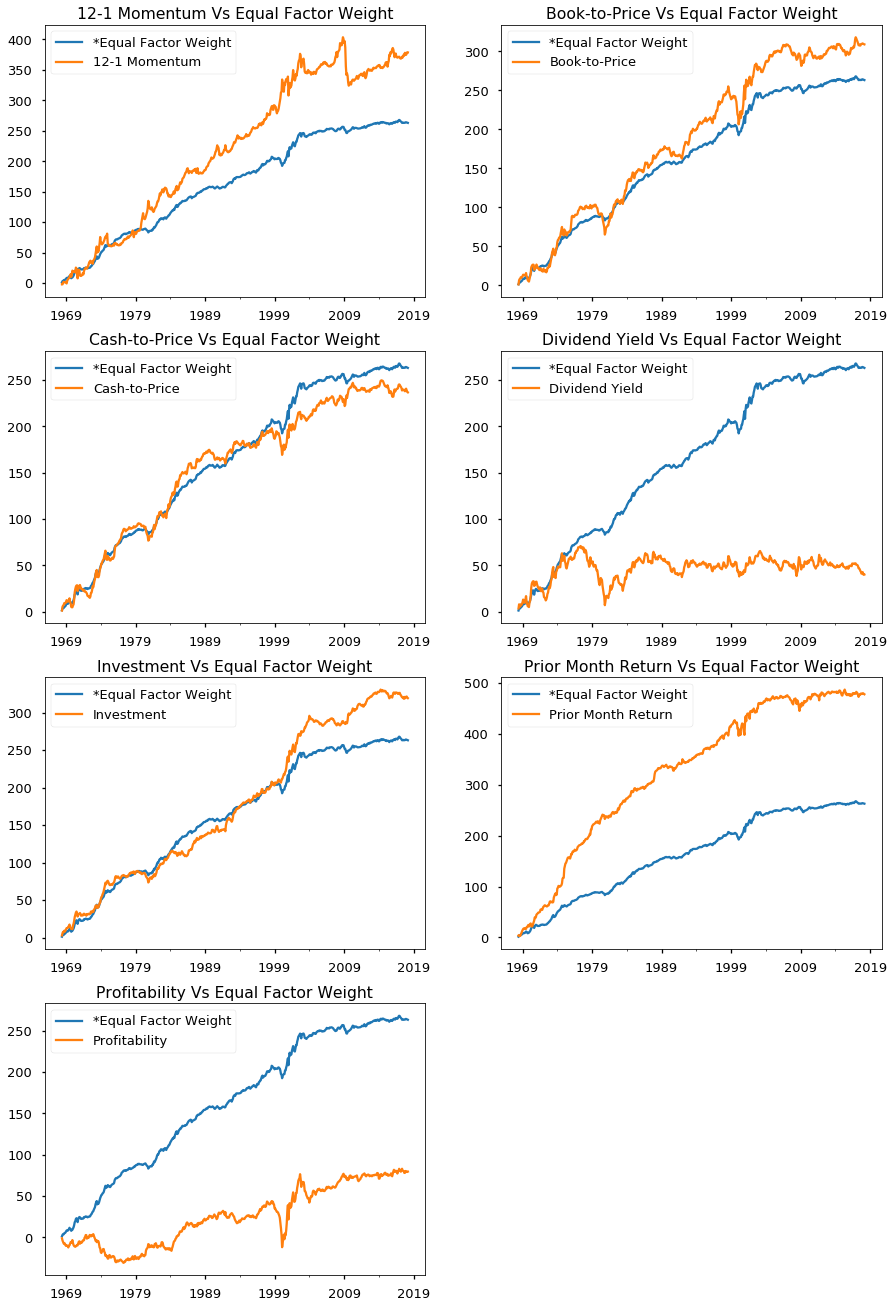

In [38]:
factor_names = corr_eq.columns.values
factor_persist = [pd.DataFrame({corr_eq.columns.values[i]: corr_eq[59:].iloc[:, i].cumsum(), '*Equal Factor Weight': eq_weighted_portfolio}) for i in range(7)]

fig, axs = plt.subplots(4,2,figsize=(15,23))
fig.delaxes(axs[-1, -1])
factor_persist[0].plot(ax=axs[0,0], title= factor_names[0] + ' Vs Equal Factor Weight')
factor_persist[1].plot(ax=axs[0,1], title= factor_names[1] + ' Vs Equal Factor Weight')
factor_persist[2].plot(ax=axs[1,0], title= factor_names[2] + ' Vs Equal Factor Weight')
factor_persist[3].plot(ax=axs[1,1], title= factor_names[3] + ' Vs Equal Factor Weight')
factor_persist[4].plot(ax=axs[2,0], title= factor_names[4] + ' Vs Equal Factor Weight')
factor_persist[5].plot(ax=axs[2,1], title= factor_names[5] + ' Vs Equal Factor Weight')
factor_persist[6].plot(ax=axs[3,0], title= factor_names[6] + ' Vs Equal Factor Weight')
plt.show()

In [39]:
from sklearn.decomposition import PCA

In [40]:
X = np.asarray(corr_eq)
[n,m] = X.shape
print('The number of timestamps is {}.'.format(n))
print('The number of factors is {}.'.format(m))

The number of timestamps is 657.
The number of factors is 7.


In [41]:
pca = PCA(n_components=3) # number of principal components
pca.fit(X)

percentage =  pca.explained_variance_ratio_
percentage_cum = np.cumsum(percentage)
print('{0:.2f}% of the variance is explained by the first 2 PCs'.format(percentage_cum[-1]*100)) 

pca_components = pca.components_

82.63% of the variance is explained by the first 2 PCs


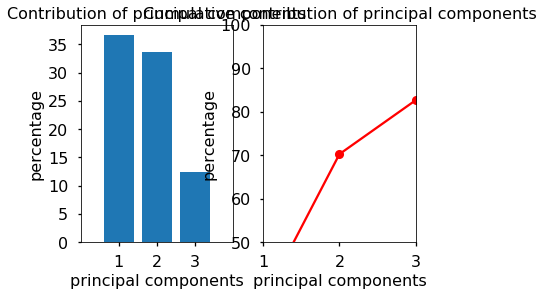

In [43]:
xx = np.arange(1,len(percentage)+1,1)

plt.subplot(1, 2, 1)
plt.bar(xx, percentage*100, align = "center")
plt.title('Contribution of principal components',fontsize = 16)
plt.xlabel('principal components',fontsize = 16)
plt.ylabel('percentage',fontsize = 16)
plt.xticks(xx,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([0, 3+1])

plt.subplot(1, 2, 2)
plt.plot(xx, percentage_cum*100,'ro-')
plt.xlabel('principal components',fontsize = 16)
plt.ylabel('percentage',fontsize = 16)
plt.title('Cumulative contribution of principal components',fontsize = 16)
plt.xticks(xx,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([1, 3])
plt.ylim([50,100]);